In [1]:
from keras.models import Model # 모델 클래스 임포트
from keras import layers
from keras import Input

In [2]:
text1_max_words = 10000 # text1의 단어 크기, 질문이 가질 수 있는 단어의 종류
text2_max_words = 10000 # text2의 단어 크기, 정보가 가질 수 있는 단어의 종류
answer_max_words = 500 # answer의 단어 크기, 답변이 가질 수 있는 단어의 종류

In [3]:
text1_input = Input(shape = (None,), dtype = 'int32', name = 'text1')
embedded_text1 = layers.Embedding(text1_max_words, 64)(text1_input)
encoded_text1 = layers.LSTM(32)(embedded_text1)

In [4]:
text2_input = Input(shape = (None,), dtype = 'int32', name = 'text2')
embedded_text2 = layers.Embedding(text2_max_words, 32)(text2_input)
encoded_text2 = layers.LSTM(16)(embedded_text2)

In [5]:
# axis = -1 은 기본값  : 마지막 차원을 기준으로 연결
concatenated = layers.concatenate([encoded_text1, encoded_text2], axis = -1)

In [6]:
import numpy as np

In [7]:
a = np.arange(10).reshape(2,5)
print('a: ',a)
b = np.arange(20,30).reshape(2,5)
print('b: ',b)

a:  [[0 1 2 3 4]
 [5 6 7 8 9]]
b:  [[20 21 22 23 24]
 [25 26 27 28 29]]


In [8]:
import tensorflow as tf
print('axis = 0 : ', tf.keras.layers.concatenate([a,b], axis = 0),'\n')
print('axis = 1 : ', tf.keras.layers.concatenate([a,b], axis = 1),'\n')
print('axis = -1 : ', tf.keras.layers.concatenate([a,b], axis = -1),'\n')

axis = 0 :  tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(4, 5), dtype=int32) 

axis = 1 :  tf.Tensor(
[[ 0  1  2  3  4 20 21 22 23 24]
 [ 5  6  7  8  9 25 26 27 28 29]], shape=(2, 10), dtype=int32) 

axis = -1 :  tf.Tensor(
[[ 0  1  2  3  4 20 21 22 23 24]
 [ 5  6  7  8  9 25 26 27 28 29]], shape=(2, 10), dtype=int32) 



In [9]:
# 출력층 생성
# answer의 후보 단어 중 어떤 것을 선택할 지를 알려주는 softmax 출력층 생성
# 최종 output
answer = tf.keras.layers.Dense(answer_max_words, activation = 'softmax')(concatenated)

In [10]:
# 모델 컴파일
# 2개의 입력 모듈을 리스트로 연결하여 Model의 inputs에 넣고
# 1개의 출력 모듈을 Model의 outputs에 넣어 모델을 구성하고 객체를 생성
model = Model(inputs = [text1_input, text2_input], outputs = answer)
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text1 (InputLayer)             [(None, None)]       0           []                               
                                                                                                  
 text2 (InputLayer)             [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 64)     640000      ['text1[0][0]']                  
                                                                                                  
 embedding_1 (Embedding)        (None, None, 32)     320000      ['text2[0][0]']                  
                                                                                              

In [12]:
from tensorflow.keras.utils import plot_model

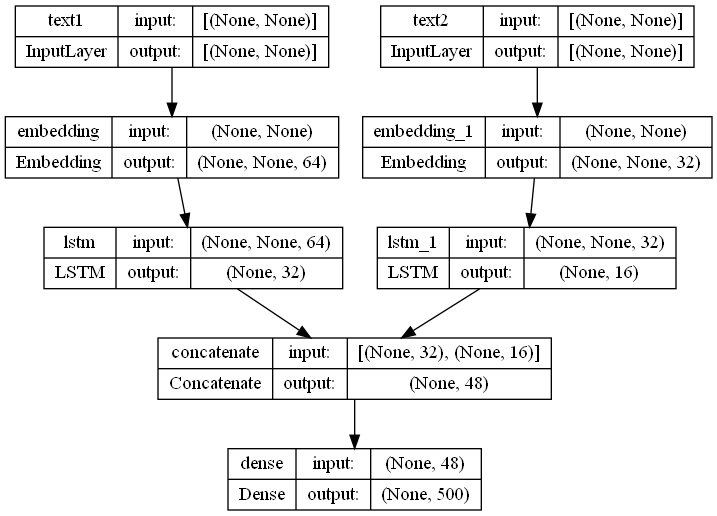

In [13]:
plot_model(model, show_shapes = True, show_layer_names = True)

In [14]:
from tensorflow.keras.utils import to_categorical
num_sameples = 1000
max_len = 100

In [15]:
# 입력 데이터 생성
# 2차원 데이터, 두 데이터의 입력되는 샘플의 수는 같아야 함
text1 = np.random.randint(low = 0, high = text1_max_words, size = (num_sameples, max_len))
text2 = np.random.randint(low = 0, high = text2_max_words, size = (num_sameples, max_len))

In [16]:
print(len(text1),len(text2))

1000 1000


In [17]:
# 답변 데이터 생성
# 다중 분류의 답변 데이터를 위해 OHE
answers = np.random.randint(low = 0, high = answer_max_words, size = num_sameples)
answers = to_categorical(answers)

In [18]:
# 모델 훈련
model.fit({'text1':text1,'text2':text2}, answers, epochs = 3, batch_size =128)

Epoch 1/3
8/8 [==============================] - 3s 17ms/step - loss: 6.2145 - acc: 0.0020
Epoch 2/3
8/8 [==============================] - 0s 17ms/step - loss: 6.1972 - acc: 0.0340
Epoch 3/3
8/8 [==============================] - 0s 16ms/step - loss: 6.1477 - acc: 0.0150


In [19]:
# 예측
prediction = model.predict({'text1':text1, 'text2':text2})
label = np.argmax(prediction[0])
print(label)

32/32 [==============================] - 1s 6ms/step
73


# [다중 출력 모델]

In [20]:
from keras import layers
from keras import Input
from keras.models import Model

In [21]:
max_words = 10000 # 사용되는 어휘 10000개
num_income_groups = 10 # 소득 수준 그룹은 총 10단계

In [22]:
blogs_input = Input(shape = (None,), dtype = 'int32', name = 'blogs')
embedded_blogs = layers.Embedding(max_words, 256)(blogs_input)

In [23]:
x = layers.Conv1D(filters = 128, kernel_size = 5, activation = 'relu')(embedded_blogs)
x = layers.MaxPooling1D(pool_size = 5)(x)
x = layers.Conv1D(filters = 256, kernel_size = 5, activation = 'relu')(x)
x = layers.Conv1D(filters = 256, kernel_size = 5, activation = 'relu')(x)
x = layers.MaxPooling1D(pool_size = 5)(x)
x = layers.Conv1D(filters = 256, kernel_size = 2, activation = 'relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation = 'relu')(x)

## 3개의 출력층 생성

In [24]:
# 출력값이 3개이므로 출력층도 3개
# 출력층 생성
# 연령 예측 모델
# regression은 activation 함수를 사용하지 않고 출력값을 그대로 얻는다.
pred_age = layers.Dense(1, name = 'age')(x)

# 소득 수준 분류 모델
pred_income = layers.Dense(num_income_groups, activation = 'softmax', name = 'income')(x)

# 성별 예측 모델
pred_gender = layers.Dense(1, activation = 'sigmoid', name = 'gender')(x)

In [25]:
# 모델 객체 생성
model = Model(blogs_input, [pred_age, pred_income, pred_gender])

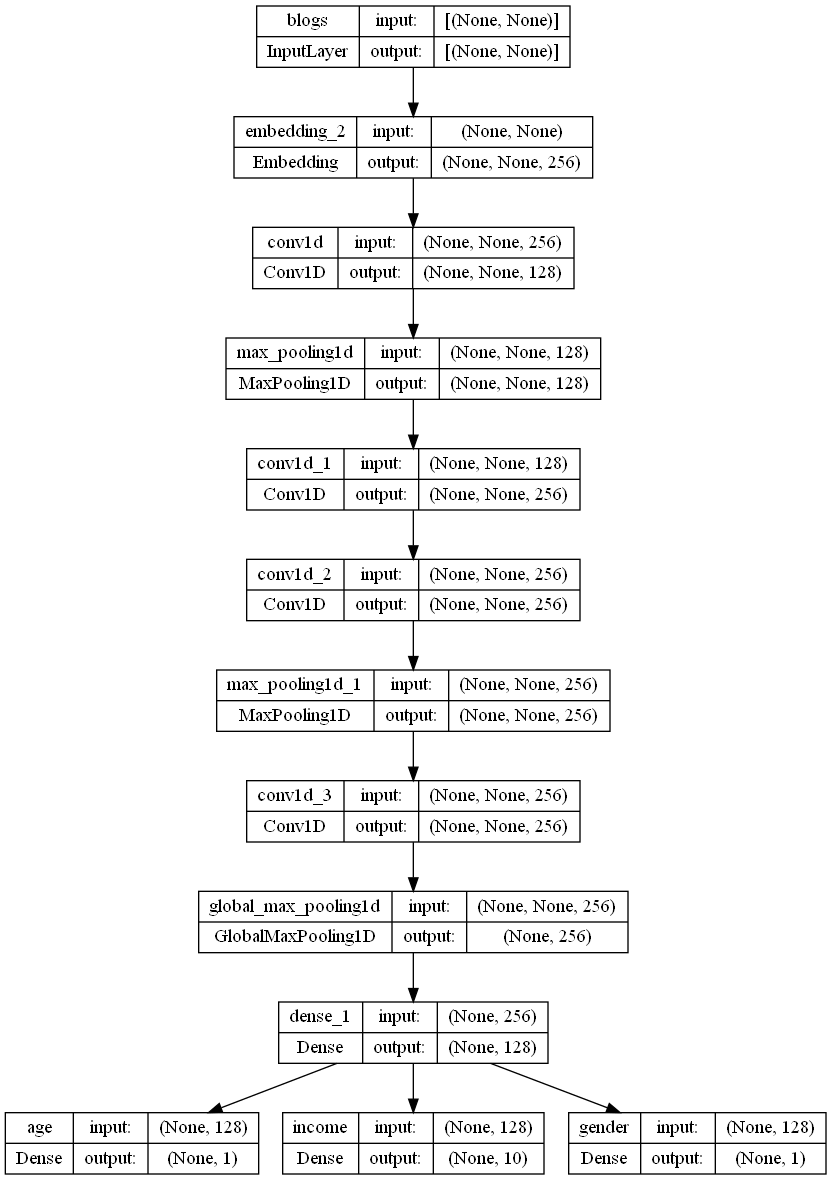

In [26]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [27]:
# 각 출력층의 이름을 지정한 경우
# model.compile(optimizer = 'rmsprop',
#              loss = {'age':'mse',
#                      'income':'categorical_crossentropy',
#                      'gender':'binary_crossentropy'})
# 출력층의 이름을 지정하지 않은 경우
# model.copile(optimizer ='rmsprop', loss=['mse','categorical_crossentropy','binary_crossentropy'])

In [28]:
model.compile(optimizer = 'rmsprop',
              loss = {'age':'mse',
                      'income':'categorical_crossentropy',
                      # 'income': 'sparse_categorical_crossentropy', # OHE을 해주지 않으면 
                      'gender':'binary_crossentropy'},
              loss_weights = {'age':0.25,
                             'income': 1.0,
                             'gender':10.0},
              metrics = ['accuracy'])

In [29]:
num_samples = 1000
max_len = 100

In [30]:
# 입력되는 소셜 블로그 (행의수 x  문장길이)의 2차원 데이터
# max_words : 단어의 종류
# max_len : 단어의 개수
blogs = np.random.randint(low=0, high = max_words, size =(num_samples, max_len))

In [31]:
blogs

array([[6373, 7259, 7854, ..., 2016, 3112, 2916],
       [ 172, 8220, 7079, ...,  357,  876, 4474],
       [3951, 1806, 5846, ..., 5635, 4289, 9926],
       ...,
       [1711, 9468, 2994, ..., 7296, 1499, 3707],
       [2033, 1127, 2875, ...,  205, 9397, 1227],
       [6460, 9058, 6203, ..., 6657, 7592, 8849]])

In [32]:
# 3개의 출력값
target_age = np.random.randint(low=0,high=100, size = num_samples)
target_income = np.random.randint(low= 0, high=10, size = num_samples)
target_income = to_categorical(target_income)
target_gender = np.random.randint(low=0, high= 2, size = num_samples)

In [33]:
with tf.device('/CPU:0'):
    model.fit(blogs, [target_age,target_income,target_gender],epochs = 3, batch_size = 64)

Epoch 1/3
16/16 [==============================] - 2s 57ms/step - loss: 353.0159 - age_loss: 1362.3464 - income_loss: 3.4434 - gender_loss: 0.8986 - age_accuracy: 0.0130 - income_accuracy: 0.1110 - gender_accuracy: 0.5130
Epoch 2/3
16/16 [==============================] - 1s 47ms/step - loss: 172.6805 - age_loss: 643.9211 - income_loss: 2.3673 - gender_loss: 0.9333 - age_accuracy: 0.0130 - income_accuracy: 0.1070 - gender_accuracy: 0.5150
Epoch 3/3
16/16 [==============================] - 1s 48ms/step - loss: 98.1845 - age_loss: 350.1606 - income_loss: 2.3853 - gender_loss: 0.8259 - age_accuracy: 0.0130 - income_accuracy: 0.0960 - gender_accuracy: 0.4940


In [34]:
with tf.device('/CPU:0'):
    result = model.predict(blogs)
result

32/32 [==============================] - 0s 10ms/step


[array([[15.738893 ],
        [46.56839  ],
        [45.6476   ],
        [13.201236 ],
        [16.970232 ],
        [47.004345 ],
        [49.296463 ],
        [54.12048  ],
        [20.393806 ],
        [39.830875 ],
        [46.546215 ],
        [12.87293  ],
        [16.137495 ],
        [25.388786 ],
        [15.777699 ],
        [53.446198 ],
        [16.246153 ],
        [17.59292  ],
        [10.549132 ],
        [62.263073 ],
        [25.141842 ],
        [52.872482 ],
        [36.763668 ],
        [ 8.535119 ],
        [10.877375 ],
        [13.436734 ],
        [10.658179 ],
        [24.213394 ],
        [20.084488 ],
        [56.644142 ],
        [14.048385 ],
        [56.87511  ],
        [13.297656 ],
        [12.949911 ],
        [23.701777 ],
        [35.59439  ],
        [52.866074 ],
        [58.755566 ],
        [29.344185 ],
        [44.11547  ],
        [15.292621 ],
        [12.262963 ],
        [44.859016 ],
        [ 8.62445  ],
        [45.884018 ],
        [2

## 잔차 연결

In [35]:
from keras.models import Model
from keras import layers
from keras import Input

In [36]:
text_max_words = 10000
answer_max_words = 200

In [37]:
# 입력
text_input = Input(shape = (None,), dtype = 'float32', name = 'text')
hidden = layers.Embedding(text_max_words, 64)(text_input)
hidden = layers.LSTM(32)(hidden)
# add와 concatenate가 어떻게 다른지 고민해볼 것
hidden = layers.add([hidden,text_input])

In [38]:
# 출력층
result = layers.Dense(answer_max_words,activation= 'softmax')(hidden)

In [39]:
model = Model(inputs = text_input, outputs = result)
model.compile(optimizer = 'rmsprop', loss= 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, None, 64)     640000      ['text[0][0]']                   
                                                                                                  
 lstm_2 (LSTM)                  (None, 32)           12416       ['embedding_3[0][0]']            
                                                                                                  
 add (Add)                      (None, 32)           0           ['lstm_2[0][0]',                 
                                                                  'text[0][0]']             

In [40]:
from tensorflow.keras.utils import to_categorical
import numpy as np

In [41]:
num_samples = 1000
max_len = 32 # 문장에 입력되는 단어의 크기가 32이어야 함

In [42]:
# 입력 데이터와 출력될 정답 데이터를 만듦
inputs = np.random.randint(low = 0, high = text_max_words, size =(num_samples, max_len))

result = np.random.randint(low=0, high= answer_max_words, size = num_samples)
result = to_categorical(result)

In [44]:
print(inputs.shape, result.shape, inputs, result, sep = "\n")

(1000, 32)
(1000, 200)
[[9965  286 6908 ... 8644 2872 3030]
 [1252 9523  358 ... 7511 9664 1881]
 [7048 6333 7111 ... 9353 1960 1449]
 ...
 [1767 9420 4786 ... 9131 9849 6855]
 [9476 1239 6701 ... 5047 1196 6371]
 [6736 4929 7350 ... 2612 6655 6343]]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [45]:
model.fit(inputs, result, epochs=3, batch_size = 8)

Epoch 1/3
125/125 [==============================] - 2s 7ms/step - loss: 5276.7393 - acc: 0.0070
Epoch 2/3
125/125 [==============================] - 1s 6ms/step - loss: 4170.2583 - acc: 0.0070
Epoch 3/3
125/125 [==============================] - 1s 6ms/step - loss: 3884.6809 - acc: 0.0090
